In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_csv('/content/drive/MyDrive/cleaned_animal_disease_prediction.csv')
print("✅ Dataset loaded successfully.")
df.head()

✅ Dataset loaded successfully.


,Animal_Type,Breed,Age,Gender,Weight,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Duration,...,Diarrhea,Coughing,Labored_Breathing,Lameness,Skin_Lesions,Nasal_Discharge,Eye_Discharge,Body_Temperature,Heart_Rate,Disease_Prediction
0,Dog,Labrador,4,Male,25.0,Fever,Lethargy,Appetite Loss,Vomiting,3 days,...,No,No,No,No,No,No,No,39.5°C,120,Parvovirus
1,Cat,Siamese,2,Female,4.5,Coughing,Sneezing,Eye Discharge,Nasal Discharge,1 week,...,No,Yes,No,No,No,Yes,Yes,38.9°C,150,Upper Respiratory Infection
2,Cow,Holstein,3,Female,600.0,Fever,Nasal Discharge,Labored Breathing,Coughing,5 days,...,No,Yes,Yes,No,No,Yes,No,40.1°C,90,Foot and Mouth Disease
3,Dog,Beagle,1,Male,10.0,Diarrhea,Vomiting,Lethargy,Appetite Loss,2 days,...,Yes,No,No,No,No,No,No,39.2°C,130,Gastroenteritis
4,Cat,Persian,5,Male,3.8,Lethargy,Appetite Loss,Skin Lesions,No,2 weeks,...,No,No,No,No,Yes,No,No,38.7°C,160,Fungal Infection


In [9]:
print("First 5 rows of the dataset:")
print(df.head(), "\n")

First 5 rows of the dataset:
  Animal_Type     Breed  Age  Gender  Weight Symptom_1        Symptom_2  \
0         Dog  Labrador    4    Male    25.0     Fever         Lethargy   
1         Cat   Siamese    2  Female     4.5  Coughing         Sneezing   
2         Cow  Holstein    3  Female   600.0     Fever  Nasal Discharge   
3         Dog    Beagle    1    Male    10.0  Diarrhea         Vomiting   
4         Cat   Persian    5    Male     3.8  Lethargy    Appetite Loss   

           Symptom_3        Symptom_4 Duration  ... Diarrhea Coughing  \
0      Appetite Loss         Vomiting   3 days  ...       No       No   
1      Eye Discharge  Nasal Discharge   1 week  ...       No      Yes   
2  Labored Breathing         Coughing   5 days  ...       No      Yes   
3           Lethargy    Appetite Loss   2 days  ...      Yes       No   
4       Skin Lesions               No  2 weeks  ...       No       No   

  Labored_Breathing Lameness Skin_Lesions Nasal_Discharge Eye_Discharge  \
0     

In [10]:
print("Dataset structure:")
print(df.info(), "\n")
print("Missing values per column:")
print(df.isnull().sum(), "\n")

Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Animal_Type         431 non-null    object 
 1   Breed               431 non-null    object 
 2   Age                 431 non-null    int64  
 3   Gender              431 non-null    object 
 4   Weight              431 non-null    float64
 5   Symptom_1           431 non-null    object 
 6   Symptom_2           431 non-null    object 
 7   Symptom_3           431 non-null    object 
 8   Symptom_4           431 non-null    object 
 9   Duration            431 non-null    object 
 10  Appetite_Loss       431 non-null    object 
 11  Vomiting            431 non-null    object 
 12  Diarrhea            431 non-null    object 
 13  Coughing            431 non-null    object 
 14  Labored_Breathing   431 non-null    object 
 15  Lameness            431 non-null    ob

In [11]:
df.dropna(inplace=True)

print("\nAfter cleaning:")
df.info()


After cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Animal_Type         431 non-null    object 
 1   Breed               431 non-null    object 
 2   Age                 431 non-null    int64  
 3   Gender              431 non-null    object 
 4   Weight              431 non-null    float64
 5   Symptom_1           431 non-null    object 
 6   Symptom_2           431 non-null    object 
 7   Symptom_3           431 non-null    object 
 8   Symptom_4           431 non-null    object 
 9   Duration            431 non-null    object 
 10  Appetite_Loss       431 non-null    object 
 11  Vomiting            431 non-null    object 
 12  Diarrhea            431 non-null    object 
 13  Coughing            431 non-null    object 
 14  Labored_Breathing   431 non-null    object 
 15  Lameness            431 non-null    obje

In [12]:
df.describe()

,Age,Weight,Heart_Rate
count,431.000000,431.000000,431.000000
mean,5.044084,214.441067,105.582367
std,2.553685,259.594305,27.892936
min,1.000000,1.000000,70.000000
25%,3.000000,8.000000,80.000000
50%,5.000000,80.000000,92.000000
75%,6.000000,500.000000,130.000000
max,16.000000,850.000000,165.000000


In [21]:
df['Body_Temperature'] = df['Body_Temperature'].astype(str).str.replace('°C', '').astype(float)


In [22]:
print(f"\nMean Temperature: {df['Body_Temperature'].mean():.2f}°C")
print(f"Median Temperature: {df['Body_Temperature'].median():.2f}°C")
print(f"Std Dev Temperature: {df['Body_Temperature'].std():.2f}°C")



Mean Temperature: 39.30°C
Median Temperature: 39.30°C
Std Dev Temperature: 0.32°C


In [24]:
if 'Disease_Prediction' in df.columns:
    print("\nGroup-wise mean values by Disease_Prediction:")
    print(df.groupby('Disease_Prediction').mean(numeric_only=True))



Group-wise mean values by Disease_Prediction:
                                     Age      Weight  Body_Temperature  \
Disease_Prediction                                                       
Actinobacillus Pleuropneumonia  4.285714  123.571429         39.357143   
Actinobacillus Suis             3.000000  105.000000         39.000000   
African Swine Fever             4.000000  137.500000         39.450000   
Allergic Rhinitis               3.000000    2.500000         39.500000   
Arthritis                       4.000000   30.000000         39.500000   
...                                  ...         ...               ...   
Tick-Borne Disease              6.000000   28.000000         39.300000   
Tuberculosis                    6.000000  620.000000         39.400000   
Upper Respiratory Infection     3.600000    3.920000         38.840000   
Viral Hemorrhagic Disease       2.000000    1.500000         39.200000   
West Nile Virus                 8.500000  650.000000         39.4

<ipython-input-28-2c8fa0a90d6b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Disease_Prediction', y='Body_Temperature', data=df, ci=None)


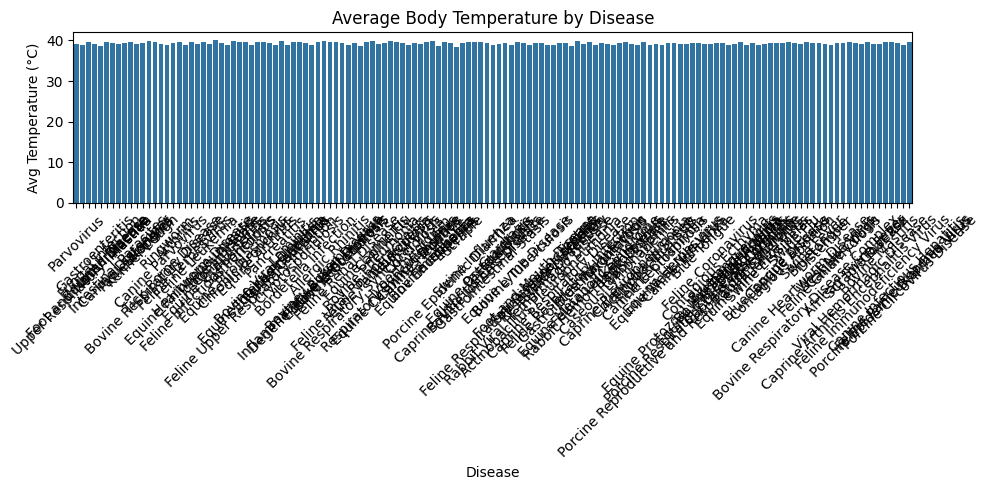

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(x='Disease_Prediction', y='Body_Temperature', data=df, ci=None)
plt.title("Average Body Temperature by Disease")
plt.xlabel("Disease")
plt.ylabel("Avg Temperature (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


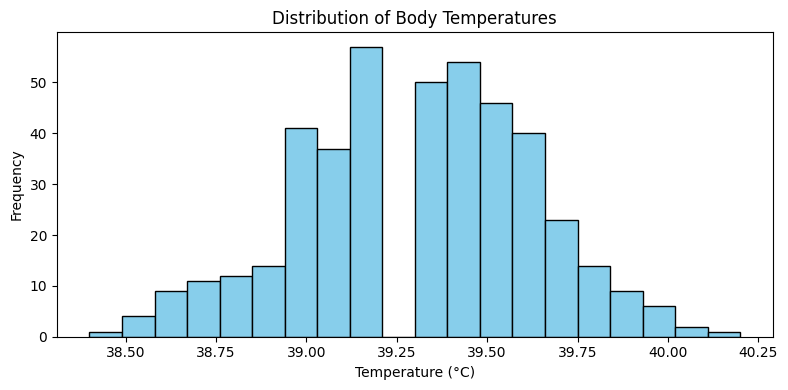

In [29]:
plt.figure(figsize=(8,4))
plt.hist(df['Body_Temperature'], bins=20, edgecolor='black', color='skyblue')
plt.title("Distribution of Body Temperatures")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

<ipython-input-30-fe8a23ce7127>:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


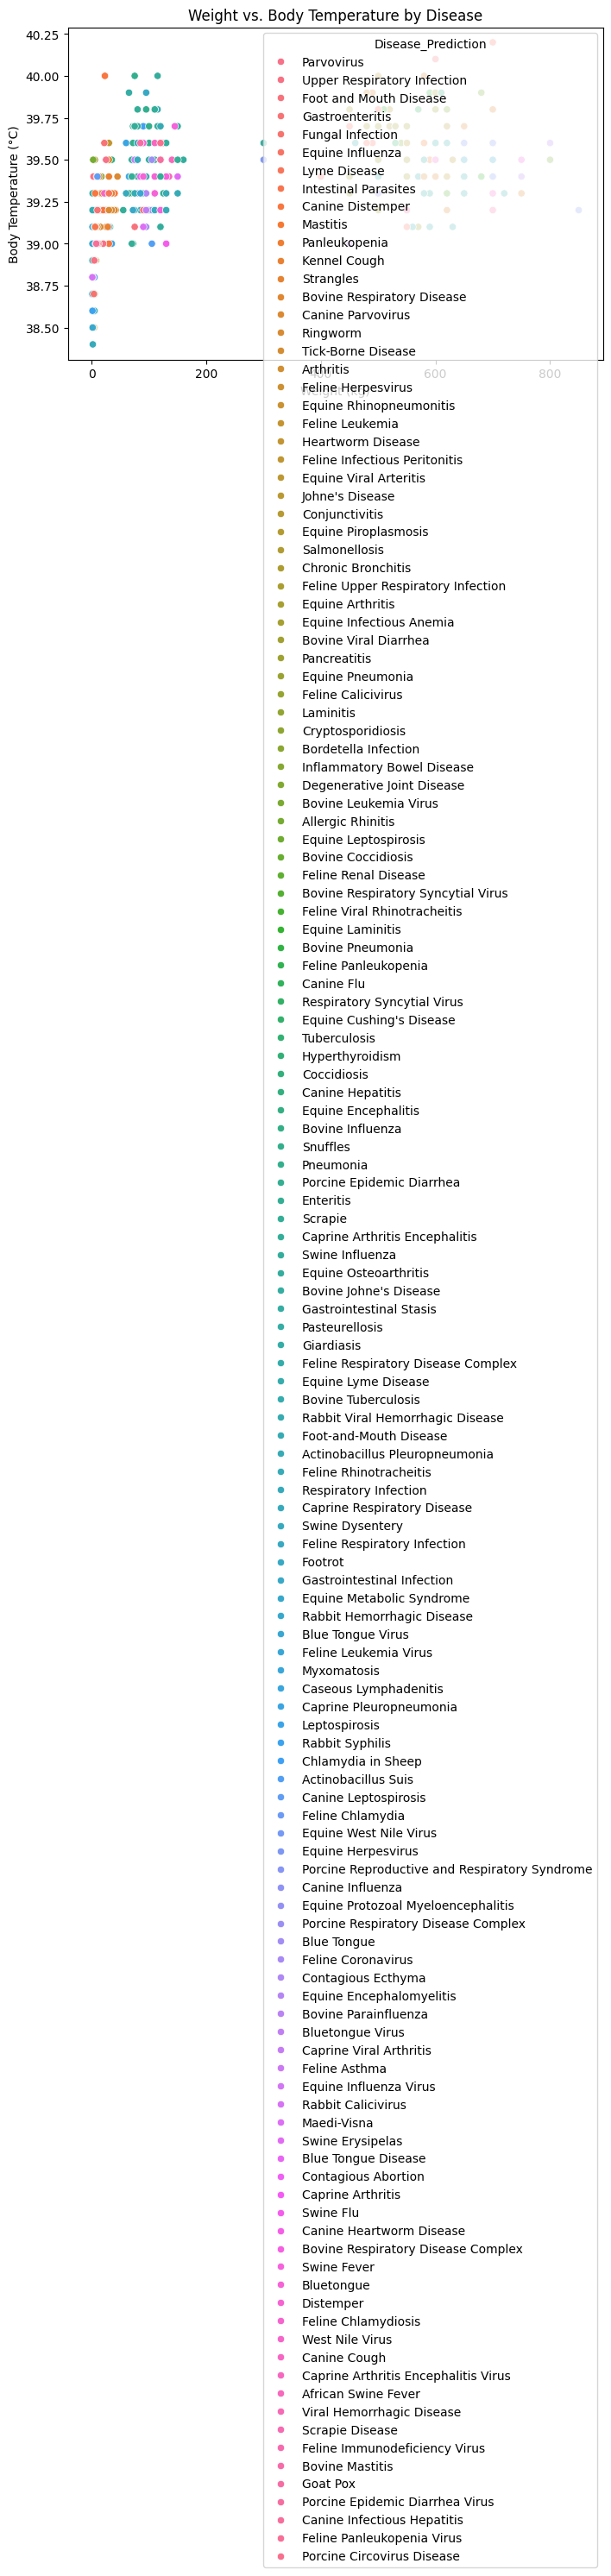

In [30]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Weight', y='Body_Temperature', hue='Disease_Prediction', data=df)
plt.title("Weight vs. Body Temperature by Disease")
plt.xlabel("Weight (kg)")
plt.ylabel("Body Temperature (°C)")
plt.tight_layout()
plt.show()


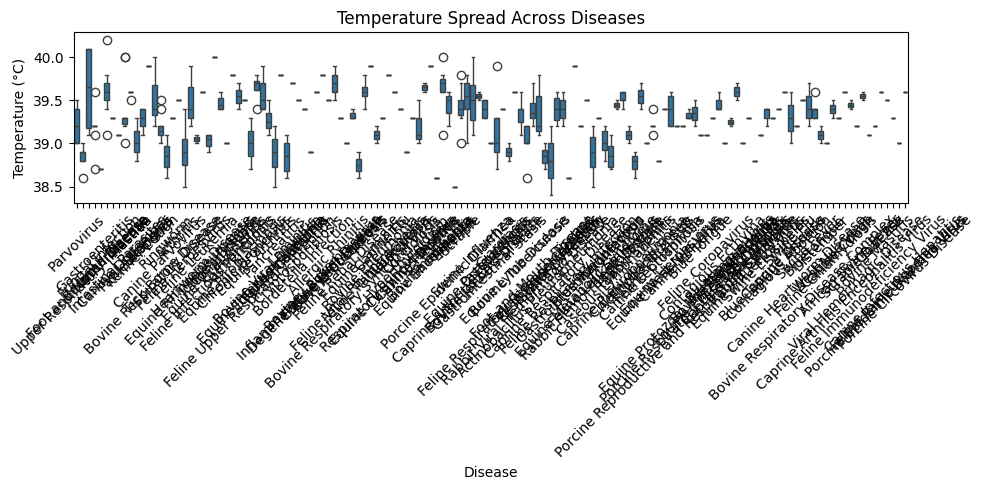

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Disease_Prediction', y='Body_Temperature', data=df)
plt.title("Temperature Spread Across Diseases")
plt.xlabel("Disease")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
